# Homework 6

## Akshay Prakash

## Logistic Regression without using any libraries. 

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# You're allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use logistic regression to predict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1, and if not, a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement logistic regression model without using any libs than imported above. 

* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 



In [3]:
age = heart_df["Age"]
sex = heart_df["Sex"]
chol = heart_df["Chol"]

X = np.array([age, sex, chol]).T
y = heart_df["Target"]
y = y.map({"No" : 0, 'Yes' : 1})
y = np.array(y)

In [4]:
def train_test_split(X, y, test_size):
    
    n= len(X)
    test_n = int(n * test_size)
    train_n = n - test_n
    
    X_train, X_test = X[:train_n], X[train_n:]
    y_train, y_test = y[:train_n], y[train_n:]
    
    return X_train, X_test, y_train, y_test

In [5]:
def logistic_regression(X, weights):
    
    prediction = np.sum(weights * X, axis = 1)
    
    prediction = 1/ (1 + np.e ** -prediction)
    return prediction

In [6]:
def mse(y, pred):
    
    n= len(y)
    return (1 / ( 2 * n )) * sum((y - pred) ** 2)

In [7]:
def gradient(X, y, weights):
    
    n = len(y)
    
    num_features= X.shape[1]
    gradient = np.zeros(num_features)
    
    for i in range(num_features):
        
        gradient[i] = (-1 / n) * sum(X[:, i] * (y - pred))
        
    return gradient

In [8]:
def accuracy(y, pred):
    pred = pred >= 0.5
    correct = np.sum(pred == y)
    return correct / y.size

Epoch 0, cost: 30.375 , accuracy: 44.03%
	grad_weights: [ 2.1090535  -0.02469136 12.12139918]
		weights: [-2.10905350e-04  2.46913580e-06 -1.21213992e-03]
Epoch 1, cost: 30.235 , accuracy: 55.97%
	grad_weights: [-2.17507166 -0.07589987 -8.35511   ]
		weights: [ 6.60181669e-06  1.00591226e-05 -3.76628918e-04]
Epoch 2, cost: 30.169 , accuracy: 55.97%
	grad_weights: [ 0.82064635 -0.040071    5.94738201]
		weights: [-7.54628179e-05  1.40662223e-05 -9.71367119e-04]
Epoch 3, cost: 30.135 , accuracy: 55.97%
	grad_weights: [-1.26641935 -0.0650156  -4.0316017 ]
		weights: [ 5.11791167e-05  2.05677820e-05 -5.68206949e-04]
Epoch 4, cost: 30.119 , accuracy: 55.97%
	grad_weights: [ 0.19834129 -0.04749992  2.95903406]
		weights: [ 3.13449882e-05  2.53177743e-05 -8.64110356e-04]
Epoch 5, cost: 30.109 , accuracy: 55.97%
	grad_weights: [-0.82408189 -0.05971928 -1.93275539]
		weights: [ 1.13753177e-04  3.12897023e-05 -6.70834816e-04]
Epoch 6, cost: 30.105 , accuracy: 55.97%
	grad_weights: [-0.10513905 -

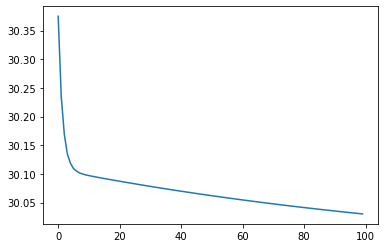

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 0.2)


learning_rate = 0.0001
max_iterations = 100
costs = []

weights = np.zeros(3)

for i in range(0, max_iterations):
    
    pred = logistic_regression(X_train, weights)
    
    cost = mse(y_train, pred) * len(y_train)
    
    acc = accuracy(y_train , pred)
    
    costs.append(cost)
    
    grad_weights = gradient(X_train, y_train, pred)
    weights = weights - learning_rate * grad_weights
    
    print("Epoch {}, cost: {:.3f} , accuracy: {:.2f}%".format(i, cost, acc * 100))
    print("\tgrad_weights: {}".format(grad_weights))
    print("\t\tweights: {}".format(weights))
    
    
plt.plot(costs)

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your logistic regression implementaion. 
Print the results. 


In [10]:
def precision(y, pred):
    
    pred = pred >= 0.5
    
    correct = np.sum(np.logical_and(y == pred,y == 1))
    total = np.sum(pred == 1)
    
    return correct / total if total > 0 else 0

def recall(y, pred):
    
    pred = pred >=0.5 
    
    correct = np.sum(np.logical_and(y== pred , y ==1))
    
    positive = np.sum(y == 1)
    
    return correct/positive if positive > 0 else 0

def f1_score(y , pred):
    
    precision_f1 = precision(y,pred)
    recall_f1 = recall(y,pred)
    
    return 2 * (precision_f1 * recall_f1) / (precision_f1 + recall_f1) if precision_f1 + recall_f1 > 0 else 0

In [11]:
pred = logistic_regression(X_test, weights)
cost = mse(y_test, pred) * len(y_test)
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print("\tAccuracy: ", acc * 100, "%")
print("\tPrecision: ", pr * 100, "%")
print("\tRecall: ", rc * 100, "%")
print("\tF1 score: ", f1 )

	Accuracy:  46.666666666666664 %
	Precision:  50.0 %
	Recall:  3.125 %
	F1 score:  0.058823529411764705


# Task 3 - (4 points)


Add y-intercept and repeat the above 2 tasks. Do you see any differences after adding the y-intercept? 


In [12]:
intercept = X.shape[0]
X_with_intercepts = np.hstack((np.ones((intercept, 1)), X))

In [13]:
X_train , X_test, y_train, y_test = train_test_split(X_with_intercepts, y, 0.2)

In [14]:
learning_rate = 0.0001
max_iterations = 100
costs = []

weights = np.zeros(4)

for i in range(0, max_iterations):
    
    pred = logistic_regression(X_train, weights)
    
    cost = mse(y_train, pred) * len(y_train)
    
    acc = accuracy(y_train , pred)
    
    costs.append(cost)
    
    grad_weights = gradient(X_train, y_train, pred)
    weights = weights - learning_rate * grad_weights
    
    print("Epoch {}, cost: {:.3f} , accuracy: {:.2f}%".format(i, cost, acc * 100))
    print("\tgrad_weights: {}".format(grad_weights))
    print("\t\tweights: {}".format(weights))


Epoch 0, cost: 30.375 , accuracy: 44.03%
	grad_weights: [ 0.05967078  2.1090535  -0.02469136 12.12139918]
		weights: [-5.96707819e-06 -2.10905350e-04  2.46913580e-06 -1.21213992e-03]
Epoch 1, cost: 30.235 , accuracy: 55.97%
	grad_weights: [-0.01861782 -2.17515035 -0.07590085 -8.35547457]
		weights: [-4.10529615e-06  6.60968476e-06  1.00592209e-05 -3.76592461e-04]
Epoch 2, cost: 30.169 , accuracy: 55.97%
	grad_weights: [ 0.0361171   0.8207218  -0.04007013  5.94775043]
		weights: [-7.71700646e-06 -7.54624953e-05  1.40662334e-05 -9.71367504e-04]
Epoch 3, cost: 30.135 , accuracy: 55.97%
	grad_weights: [-2.02884975e-03 -1.26652319e+00 -6.50168923e-02 -4.03208336e+00]
		weights: [-7.51412149e-06  5.11898236e-05  2.05679226e-05 -5.68159168e-04]
Epoch 4, cost: 30.119 , accuracy: 55.97%
	grad_weights: [ 0.02472954  0.19841141 -0.04749914  2.95938321]
		weights: [-9.98707515e-06  3.13486823e-05  2.53178364e-05 -8.64097489e-04]
Epoch 5, cost: 30.109 , accuracy: 55.97%
	grad_weights: [ 0.00603645 

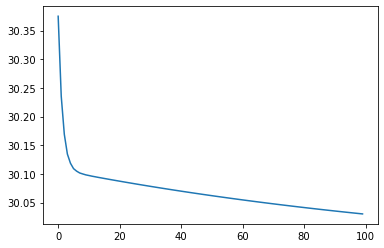

In [15]:
plt.plot(np.arange(max_iterations), costs)
plt.show()

In [16]:
pred = logistic_regression(X_test, weights)
cost = mse(y_test, pred) * len(y_test)
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print("\tAccuracy: ", acc * 100, "%")
print("\tPrecision: ", pr * 100, "%")
print("\tRecall: ", rc * 100, "%")
print("\tF1 score: ", f1 )

	Accuracy:  46.666666666666664 %
	Precision:  50.0 %
	Recall:  3.125 %
	F1 score:  0.058823529411764705


    there appears to be almost no difference with the addition of the intercept term, which is surprising.

# Task 4 - Implement the Bold Driver   - (4 points)
In your GD implementation, add the bold driver idea to have a dynamic learning rate.

* Add a stop codition to stop the GD when the cost is not changing more than 0.001. (differences between two costs not more than 0.001, then stop)
* Can you stop earlier than 100 iterations? 




Epoch 0, cost: 30.375 , accuracy: 44.03%
	grad_weights: [ 2.1090535  -0.02469136 12.12139918]
		weights: [-2.10905350e-03  2.46913580e-05 -1.21213992e-02]
Epoch 1: decreasing learning rate by 45%
Epoch 2: decreasing learning rate by 45%
Epoch 3: increasing learning rate by 5%
Epoch 4: increasing learning rate by 5%
Epoch 5, cost: 38.113 , accuracy: 55.97%
	grad_weights: [-14.49053025  -0.22612682 -66.57505454]
		weights: [0.00327306 0.00019484 0.00912471]
Epoch 5: decreasing learning rate by 45%
Epoch 6: decreasing learning rate by 45%
Epoch 7: increasing learning rate by 5%
Epoch 8: increasing learning rate by 5%
Epoch 9: increasing learning rate by 5%
Epoch 10, cost: 30.074 , accuracy: 55.97%
	grad_weights: [-0.41464838 -0.0547553  -0.17235842]
		weights: [ 0.00123221  0.00018442 -0.00099357]
Epoch 10: increasing learning rate by 5%
Epoch 11: increasing learning rate by 5%
Stopping at epoch 11


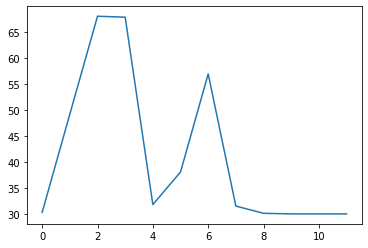

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

lr = 0.001
iterations = 100

costs = []

weights = np.zeros(3)
for i in range(iterations):
    pred = logistic_regression(X_train, weights)
    cost = mse(y_train, pred) * len(y_train)
    acc = accuracy(y_train, pred)
    costs.append(cost)
    
    grad_weights = gradient(X_train, y_train, weights)
    weights = weights - lr * grad_weights 
    
    if i % 5 == 0:
        print("Epoch {}, cost: {:.3f} , accuracy: {:.2f}%".format(i, cost, acc * 100))
        print("\tgrad_weights: {}".format(grad_weights))
        print("\t\tweights: {}".format(weights))
        
    if i > 0:
        if costs[i] < costs[i-1]:
            print("Epoch {}: increasing learning rate by 5%".format(i))
            lr = 1.05 * lr
        if costs[i] > costs[i-1]:
            print("Epoch {}: decreasing learning rate by 45%".format(i))
            lr = 0.45 * lr
            
    if i > 0 and (abs(costs[i] - costs[i-1]) <= 0.001):
        print("Stopping at epoch {}".format(i))
        break

plt.plot(costs)  

# Task 5 - Implement the L2 norm regularization.  - (4 points)

Modify your Cost and gradient to implement the l2 norm regularization. 
Repeat the task 1 and 2 to check if your result is changing. 

* Use y-intercept. 
* Do max 100 iterations as before and report your accuracy, Precision, Recall and F1. 
* You can stop earlier when the cost is not changing than 0.001. 


**Optional:** you might want to use the bold driver. But you can do this task without the bold driver as well. 



Epoch 0, cost: 30.375 , accuracy: 44.03%
	 learning rate: 0.001 
	 grad_weights: [ 0.05967078  2.1090535  -0.02469136 12.12139918]
	 ridge: {}
	 weights: [-5.96707819e-05 -2.10905350e-03  2.46913580e-05 -1.21213992e-02]
Epoch 1: decreasing learning rate by 50%
Epoch 2: decreasing learning rate by 50%
Epoch 3: decreasing learning rate by 50%
Stopping at epoch 3
	Accuracy:  53.333333333333336 %
	Precision:  53.333333333333336 %
	Recall:  100.0 %
	F1 score:  0.6956521739130436


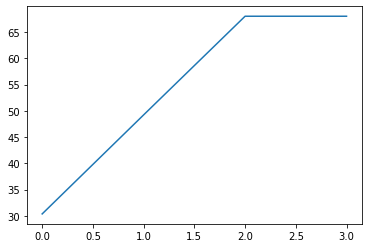

In [18]:
intercept = X.shape[0]
X_with_intercepts = np.hstack((np.ones((intercept, 1)), X))

X_train , X_test, y_train, y_test = train_test_split(X_with_intercepts, y, 0.2)

lr = 0.001
max_iterations = 100
lamb = 1
costs = []

weights = np.zeros(4)

for i in range(0, max_iterations):
    
    pred = logistic_regression(X_train, weights)
    cost = mse(y_train, pred) * len(y_train)
    acc = accuracy(y_train, pred)
    costs.append(cost)
    
    ridge = lamb * np.sum(weights)
    grad_weights = gradient(X_train, y_train, weights)
    weights = weights - lr * grad_weights + ridge
    
    if i % 5 == 0:
        print("Epoch {}, cost: {:.3f} , accuracy: {:.2f}%".format(i, cost, acc * 100))
        print("\t learning rate: {} ".format(lr))
        print("\t grad_weights: {}".format(grad_weights))
        print("\t ridge: {}")
        print("\t weights: {}".format(weights))
        
    if i > 0:
        if costs[i] < costs[i-1]:
            print("Epoch {}: increasing learning rate by 5%".format(i))
            lr = 1.05 * lr
        if costs[i] > costs[i-1]:
            print("Epoch {}: decreasing learning rate by 50%".format(i))
            lr = 0.50 * lr
            
    if i > 0 and (abs(costs[i] - costs[i-1]) <= 0.001):
        print("Stopping at epoch {}".format(i))
        break

plt.plot(costs)

pred = logistic_regression(X_test, weights)
cost = mse(y_test, pred) * len(y_test)
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print("\tAccuracy: ", acc * 100, "%")
print("\tPrecision: ", pr * 100, "%")
print("\tRecall: ", rc * 100, "%")
print("\tF1 score: ", f1 )